In [1]:
import matplotlib.pyplot as plt
import numpy as np
import os
import PIL
import tensorflow as tf

In [2]:
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

In [3]:
import pathlib
data_dir = './vehicles_images'
data_dir_test = './vehicle2'

In [4]:
batch_size = 32
img_height = 160
img_width = 160

train_ds = tf.keras.preprocessing.image_dataset_from_directory(data_dir,
                                                              validation_split = 0.2,
                                                              subset = "training",
                                                              seed =123,
                                                              image_size = (img_height,img_width),
                                                              batch_size = batch_size)
val_ds = tf.keras.preprocessing.image_dataset_from_directory(data_dir,
                                                            validation_split = 0.2,
                                                            subset= "validation",
                                                            seed = 123,
                                                            image_size= (img_height,img_width),
                                                            batch_size = batch_size,
                                                            )

class_names = train_ds.class_names
print(class_names)

Found 4318 files belonging to 4 classes.
Using 3455 files for training.
Found 4318 files belonging to 4 classes.
Using 863 files for validation.
['bus', 'motorcycle', 'plane', 'train']


In [5]:
# The next bit of code will print our class names for information

In [6]:
for i, j in train_ds.take(1):
    v = i[0]

In [7]:
v / 255

<tf.Tensor: shape=(160, 160, 3), dtype=float32, numpy=
array([[[0.02156863, 0.02156863, 0.02156863],
        [0.01470588, 0.01470588, 0.01470588],
        [0.03137255, 0.03137255, 0.03137255],
        ...,
        [0.11666667, 0.11666667, 0.11666667],
        [0.11078431, 0.11078431, 0.11078431],
        [0.11568628, 0.11568628, 0.11568628]],

       [[0.01960784, 0.01960784, 0.01960784],
        [0.00980392, 0.00980392, 0.00980392],
        [0.01862745, 0.01862745, 0.01862745],
        ...,
        [0.11960784, 0.11960784, 0.11960784],
        [0.11470588, 0.11470588, 0.11470588],
        [0.11176471, 0.11176471, 0.11176471]],

       [[0.01764706, 0.01764706, 0.01764706],
        [0.01568628, 0.01568628, 0.01568628],
        [0.02156863, 0.02156863, 0.02156863],
        ...,
        [0.12352941, 0.12352941, 0.12352941],
        [0.12254902, 0.12254902, 0.12254902],
        [0.11764706, 0.11764706, 0.11764706]],

       ...,

       [[0.13627452, 0.13627452, 0.13627452],
        [0.14

In [8]:
AUTOTUNE = tf.data.AUTOTUNE
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size = AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size = AUTOTUNE)


normalization_layer = layers.experimental.preprocessing.Rescaling(1./255)
normalized_ds = train_ds.map(lambda x,y: (normalization_layer(x),y))

image_batch, labels_batch = next(iter(normalized_ds))
first_image = image_batch[0]

# Notice the pixel values are now in'[0,1]'.
print(np.min(first_image), np.max(first_image))

num_classes = 4

0.0 1.0


In [9]:
first_image

<tf.Tensor: shape=(160, 160, 3), dtype=float32, numpy=
array([[[0.62549025, 0.7039216 , 0.73529416],
        [0.6450981 , 0.72352946, 0.754902  ],
        [0.66470593, 0.74509805, 0.7686275 ],
        ...,
        [0.87254906, 0.93529415, 0.92352945],
        [0.882353  , 0.9431373 , 0.9313726 ],
        [0.87843144, 0.9392157 , 0.927451  ]],

       [[0.62352943, 0.7137255 , 0.7372549 ],
        [0.654902  , 0.7294118 , 0.7568628 ],
        [0.6666667 , 0.7490196 , 0.7686275 ],
        ...,
        [0.8862746 , 0.9450981 , 0.9333334 ],
        [0.87843144, 0.9450981 , 0.9215687 ],
        [0.88823533, 0.94705886, 0.927451  ]],

       [[0.6450981 , 0.7196079 , 0.74705887],
        [0.6568628 , 0.73529416, 0.7568628 ],
        [0.6568628 , 0.75098044, 0.7666667 ],
        ...,
        [0.8941177 , 0.94705886, 0.93725497],
        [0.8862746 , 0.9450981 , 0.9333334 ],
        [0.90000004, 0.9431373 , 0.93725497]],

       ...,

       [[0.45686278, 0.51568633, 0.43333337],
        [0.46

In [10]:
#initial model

In [11]:
model = Sequential([
    layers.experimental.preprocessing.Rescaling(1./255, input_shape = (img_height, img_width, 3)),
    
    layers.Conv2D(16,3, padding='same', activation = 'relu'),
    layers.MaxPooling2D(),
    
    layers.Conv2D(32,3, padding = 'same', activation = 'relu'),
    layers.MaxPooling2D(),
    
    layers.Conv2D(64,3, padding = 'same', activation = 'relu'),
    layers.MaxPooling2D(),
    
       
    layers.Flatten(),
    
    layers.Dense(128, activation = 'relu'),
    layers.Dense(num_classes)
]) 



model.compile(optimizer = 'adam',
             loss = keras.losses.SparseCategoricalCrossentropy(from_logits= True),
             metrics = ['accuracy'])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling_1 (Rescaling)     (None, 160, 160, 3)       0         
                                                                 
 conv2d (Conv2D)             (None, 160, 160, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 80, 80, 16)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 80, 80, 32)        4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 40, 40, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 40, 40, 64)        1

In [12]:
%%time
epochs = 10
history = model.fit(
train_ds,
validation_data = val_ds,
epochs = epochs)

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']
epochs_range = range(epochs)

Epoch 1/10
108/108 [==============================] - 65s 596ms/step - loss: 1.2477 - accuracy: 0.4330 - val_loss: 1.0536 - val_accuracy: 0.5655
Epoch 2/10
108/108 [==============================] - 54s 497ms/step - loss: 1.0012 - accuracy: 0.5829 - val_loss: 0.9697 - val_accuracy: 0.5886
Epoch 3/10
108/108 [==============================] - 54s 497ms/step - loss: 0.8549 - accuracy: 0.6660 - val_loss: 0.8996 - val_accuracy: 0.6350
Epoch 4/10
108/108 [==============================] - 55s 508ms/step - loss: 0.7178 - accuracy: 0.7190 - val_loss: 0.9691 - val_accuracy: 0.6095
Epoch 5/10
108/108 [==============================] - 54s 500ms/step - loss: 0.5602 - accuracy: 0.7890 - val_loss: 1.0042 - val_accuracy: 0.6257
Epoch 6/10
108/108 [==============================] - 54s 498ms/step - loss: 0.3906 - accuracy: 0.8625 - val_loss: 1.1377 - val_accuracy: 0.5921
Epoch 7/10
108/108 [==============================] - 54s 498ms/step - loss: 0.2830 - accuracy: 0.9143 - val_loss: 1.3045 - val_ac

## Average Pooling vs Max Pooling

#### max pooling

In [13]:
model = Sequential([
    layers.experimental.preprocessing.Rescaling(1./255, input_shape = (img_height, img_width, 3)),
    
    layers.Conv2D(16,3, padding='same', activation = 'relu'),
    layers.MaxPooling2D(),
    
    layers.Conv2D(32,3, padding = 'same', activation = 'relu'),
    layers.MaxPooling2D(),
    
    layers.Conv2D(64,3, padding = 'same', activation = 'relu'),
    layers.MaxPooling2D(),
    
    layers.Conv2D(128,3, padding = 'same', activation = 'relu'),
    layers.MaxPooling2D(),

    
    layers.Flatten(),
    
    layers.Dense(64, activation = 'relu'),
    layers.Dense(num_classes)
]) 

In [14]:
model.compile(optimizer = 'adam',
             loss = keras.losses.SparseCategoricalCrossentropy(from_logits= True),
             metrics = ['accuracy'])

In [15]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling_2 (Rescaling)     (None, 160, 160, 3)       0         
                                                                 
 conv2d_3 (Conv2D)           (None, 160, 160, 16)      448       
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 80, 80, 16)       0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 80, 80, 32)        4640      
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 40, 40, 32)       0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 40, 40, 64)       

In [16]:
%%time
epochs = 10
history = model.fit(
train_ds,
validation_data = val_ds,
epochs = epochs)

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']
epochs_range = range(epochs)

Epoch 1/10
108/108 [==============================] - 60s 550ms/step - loss: 1.2425 - accuracy: 0.4211 - val_loss: 1.0887 - val_accuracy: 0.5504
Epoch 2/10
108/108 [==============================] - 60s 556ms/step - loss: 1.0667 - accuracy: 0.5427 - val_loss: 0.9915 - val_accuracy: 0.5759
Epoch 3/10
108/108 [==============================] - 59s 546ms/step - loss: 0.9782 - accuracy: 0.5997 - val_loss: 0.9858 - val_accuracy: 0.6025
Epoch 4/10
108/108 [==============================] - 60s 553ms/step - loss: 0.8899 - accuracy: 0.6446 - val_loss: 1.0025 - val_accuracy: 0.5991
Epoch 5/10
108/108 [==============================] - 59s 546ms/step - loss: 0.8182 - accuracy: 0.6816 - val_loss: 0.8927 - val_accuracy: 0.6292
Epoch 6/10
108/108 [==============================] - 60s 553ms/step - loss: 0.7260 - accuracy: 0.7091 - val_loss: 0.8932 - val_accuracy: 0.6362
Epoch 7/10
108/108 [==============================] - 60s 554ms/step - loss: 0.6468 - accuracy: 0.7624 - val_loss: 0.9686 - val_ac

#### average pooling

In [17]:
model = Sequential([
    layers.experimental.preprocessing.Rescaling(1./255, input_shape = (img_height, img_width, 3)),
    
    layers.Conv2D(16,3, padding='same', activation = 'relu'),
    layers.AveragePooling2D(),
    
    layers.Conv2D(32,3, padding = 'same', activation = 'relu'),
    layers.AveragePooling2D(),
    
    layers.Conv2D(64,3, padding = 'same', activation = 'relu'),
    layers.AveragePooling2D(),
    
    layers.Conv2D(128,3, padding = 'same', activation = 'relu'),
    layers.AveragePooling2D(),

    
    layers.Flatten(),
    
    layers.Dense(64, activation = 'relu'),
    layers.Dense(num_classes)
])

In [18]:
model.compile(optimizer = 'adam',
             loss = keras.losses.SparseCategoricalCrossentropy(from_logits= True),
             metrics = ['accuracy'])

In [19]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling_3 (Rescaling)     (None, 160, 160, 3)       0         
                                                                 
 conv2d_7 (Conv2D)           (None, 160, 160, 16)      448       
                                                                 
 average_pooling2d (AverageP  (None, 80, 80, 16)       0         
 ooling2D)                                                       
                                                                 
 conv2d_8 (Conv2D)           (None, 80, 80, 32)        4640      
                                                                 
 average_pooling2d_1 (Averag  (None, 40, 40, 32)       0         
 ePooling2D)                                                     
                                                                 
 conv2d_9 (Conv2D)           (None, 40, 40, 64)       

In [20]:
%%time
epochs = 10
history = model.fit(
train_ds,
validation_data = val_ds,
epochs = epochs)

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']
epochs_range = range(epochs)

Epoch 1/10
108/108 [==============================] - 55s 505ms/step - loss: 1.2757 - accuracy: 0.3922 - val_loss: 1.1550 - val_accuracy: 0.4693
Epoch 2/10
108/108 [==============================] - 54s 504ms/step - loss: 1.1017 - accuracy: 0.5242 - val_loss: 1.0971 - val_accuracy: 0.5492
Epoch 3/10
108/108 [==============================] - 55s 506ms/step - loss: 1.0524 - accuracy: 0.5473 - val_loss: 1.0363 - val_accuracy: 0.5585
Epoch 4/10
108/108 [==============================] - 54s 501ms/step - loss: 0.9615 - accuracy: 0.6026 - val_loss: 0.9499 - val_accuracy: 0.6234
Epoch 5/10
108/108 [==============================] - 54s 501ms/step - loss: 0.9075 - accuracy: 0.6362 - val_loss: 0.9563 - val_accuracy: 0.6165
Epoch 6/10
108/108 [==============================] - 54s 501ms/step - loss: 0.8372 - accuracy: 0.6657 - val_loss: 0.9201 - val_accuracy: 0.6443
Epoch 7/10
108/108 [==============================] - 54s 501ms/step - loss: 0.7920 - accuracy: 0.6865 - val_loss: 0.9129 - val_ac

# Shallow Network

In [21]:
model = Sequential([
    layers.experimental.preprocessing.Rescaling(1./255, input_shape = (img_height, img_width, 3)),
    
    layers.Conv2D(16,3, padding='same', activation = 'relu'),
    layers.MaxPooling2D(),
    
    layers.Conv2D(32,3, padding = 'same', activation = 'relu'),
    layers.MaxPooling2D(),
    
    layers.Conv2D(64,3, padding = 'same', activation = 'relu'),
    layers.MaxPooling2D(),
    
    layers.Flatten(),
    
    layers.Dense(128, activation = 'relu'),
    layers.Dense(num_classes)
])

In [22]:
model.compile(optimizer = 'adam',
             loss = keras.losses.SparseCategoricalCrossentropy(from_logits= True),
             metrics = ['accuracy'])

In [23]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling_4 (Rescaling)     (None, 160, 160, 3)       0         
                                                                 
 conv2d_11 (Conv2D)          (None, 160, 160, 16)      448       
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 80, 80, 16)       0         
 2D)                                                             
                                                                 
 conv2d_12 (Conv2D)          (None, 80, 80, 32)        4640      
                                                                 
 max_pooling2d_8 (MaxPooling  (None, 40, 40, 32)       0         
 2D)                                                             
                                                                 
 conv2d_13 (Conv2D)          (None, 40, 40, 64)       

In [24]:
%%time
epochs = 10
history = model.fit(
train_ds,
validation_data = val_ds,
epochs = epochs)

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']
epochs_range = range(epochs)

Epoch 1/10
108/108 [==============================] - 54s 493ms/step - loss: 1.2511 - accuracy: 0.4203 - val_loss: 1.1779 - val_accuracy: 0.4473
Epoch 2/10
108/108 [==============================] - 53s 492ms/step - loss: 1.0366 - accuracy: 0.5673 - val_loss: 0.9791 - val_accuracy: 0.6049
Epoch 3/10
108/108 [==============================] - 53s 491ms/step - loss: 0.9129 - accuracy: 0.6295 - val_loss: 0.9716 - val_accuracy: 0.5991
Epoch 4/10
108/108 [==============================] - 54s 503ms/step - loss: 0.8236 - accuracy: 0.6836 - val_loss: 1.0171 - val_accuracy: 0.5863
Epoch 5/10
108/108 [==============================] - 54s 495ms/step - loss: 0.6933 - accuracy: 0.7369 - val_loss: 1.0772 - val_accuracy: 0.5863
Epoch 6/10
108/108 [==============================] - 53s 491ms/step - loss: 0.5284 - accuracy: 0.8052 - val_loss: 1.0889 - val_accuracy: 0.5933
Epoch 7/10
108/108 [==============================] - 53s 492ms/step - loss: 0.3825 - accuracy: 0.8671 - val_loss: 1.3630 - val_ac

# Deeper Network

In [25]:
model = Sequential([
    layers.experimental.preprocessing.Rescaling(1./255, input_shape = (img_height, img_width, 3)),
    
    layers.Conv2D(16,3, padding='same', activation = 'relu'),
    layers.MaxPooling2D(),
    
    layers.Conv2D(32,3, padding = 'same', activation = 'relu'),
    layers.MaxPooling2D(),
    
    layers.Conv2D(64,3, padding = 'same', activation = 'relu'),
    layers.MaxPooling2D(),
    
    layers.Conv2D(128,3, padding = 'same', activation = 'relu'),
    layers.MaxPooling2D(),
    
    layers.Conv2D(256,3, padding = 'same', activation = 'relu'),
    layers.MaxPooling2D(),
    
    layers.Conv2D(512,3, padding = 'same', activation = 'relu'),
    layers.MaxPooling2D(),
    
    layers.Flatten(),
    
    layers.Dense(32, activation = 'relu'),
    layers.Dense(num_classes)
])    

In [26]:
model.compile(optimizer = 'adam',
             loss = keras.losses.SparseCategoricalCrossentropy(from_logits= True),
             metrics = ['accuracy'])

In [27]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling_5 (Rescaling)     (None, 160, 160, 3)       0         
                                                                 
 conv2d_14 (Conv2D)          (None, 160, 160, 16)      448       
                                                                 
 max_pooling2d_10 (MaxPoolin  (None, 80, 80, 16)       0         
 g2D)                                                            
                                                                 
 conv2d_15 (Conv2D)          (None, 80, 80, 32)        4640      
                                                                 
 max_pooling2d_11 (MaxPoolin  (None, 40, 40, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_16 (Conv2D)          (None, 40, 40, 64)       

In [28]:
%%time
epochs = 10
history = model.fit(
train_ds,
validation_data = val_ds,
epochs = epochs)

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']
epochs_range = range(epochs)

Epoch 1/10
108/108 [==============================] - 83s 762ms/step - loss: 1.3664 - accuracy: 0.3320 - val_loss: 1.3521 - val_accuracy: 0.3534
Epoch 2/10
108/108 [==============================] - 81s 754ms/step - loss: 1.2805 - accuracy: 0.3919 - val_loss: 1.1661 - val_accuracy: 0.4959
Epoch 3/10
108/108 [==============================] - 82s 760ms/step - loss: 1.1292 - accuracy: 0.5082 - val_loss: 1.0823 - val_accuracy: 0.5365
Epoch 4/10
108/108 [==============================] - 81s 750ms/step - loss: 1.0501 - accuracy: 0.5505 - val_loss: 0.9943 - val_accuracy: 0.5991
Epoch 5/10
108/108 [==============================] - 81s 751ms/step - loss: 0.9909 - accuracy: 0.5835 - val_loss: 0.9809 - val_accuracy: 0.6060
Epoch 6/10
108/108 [==============================] - 81s 754ms/step - loss: 0.9376 - accuracy: 0.6179 - val_loss: 1.0035 - val_accuracy: 0.5794
Epoch 7/10
108/108 [==============================] - 82s 760ms/step - loss: 0.8763 - accuracy: 0.6480 - val_loss: 0.9626 - val_ac

In [29]:
#the acc,val_acc,loss and val_loss and accuracy is collected from the history in the code image above. We'll use this to plot the learning process

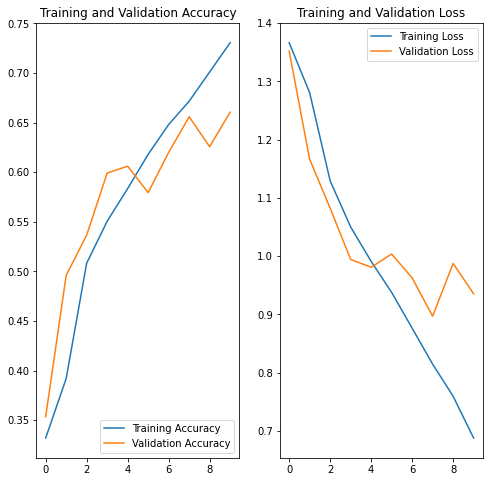

In [30]:
plt.figure(figsize=(8,8))
plt.subplot(1,2,1)
plt.plot(epochs_range,acc, label = 'Training Accuracy')
plt.plot(epochs_range, val_acc, label = 'Validation Accuracy')
plt.legend(loc= 'lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1,2,2)
plt.plot(epochs_range,loss, label = 'Training Loss')
plt.plot(epochs_range, val_loss, label = 'Validation Loss')
plt.legend(loc= 'upper right')
plt.title('Training and Validation Loss')
plt.show()


# My Model

In [31]:
model = Sequential([
    layers.experimental.preprocessing.Rescaling(1./255, input_shape = (img_height, img_width, 3)),
    
    layers.Conv2D(16,3, padding='same', activation = 'relu'),
    layers.MaxPooling2D(),
    
    layers.Conv2D(32,3, padding = 'same', activation = 'relu'),
    layers.MaxPooling2D(),
    
    layers.Conv2D(64,3, padding = 'same', activation = 'relu'),
    layers.MaxPooling2D(),
    
    layers.Conv2D(128,3, padding = 'same', activation = 'relu'),
    layers.MaxPooling2D(),
    
    layers.Conv2D(256,3, padding = 'same', activation = 'relu'),
    layers.MaxPooling2D(),
    
    layers.Flatten(),
    
    layers.Dense(508, activation = 'relu'),
    layers.Dense(num_classes)
    
])

In [32]:
model.compile(optimizer = 'adam',
             loss = keras.losses.SparseCategoricalCrossentropy(from_logits= True),
             metrics = ['accuracy'])

In [33]:
%%time
epochs = 10
history = model.fit(
train_ds,
validation_data = val_ds,
epochs = epochs)

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']
epochs_range = range(epochs)

Epoch 1/10
108/108 [==============================] - 72s 661ms/step - loss: 1.2612 - accuracy: 0.4098 - val_loss: 1.0761 - val_accuracy: 0.5527
Epoch 2/10
108/108 [==============================] - 70s 651ms/step - loss: 1.0575 - accuracy: 0.5592 - val_loss: 0.9855 - val_accuracy: 0.5817
Epoch 3/10
108/108 [==============================] - 70s 650ms/step - loss: 0.9818 - accuracy: 0.5936 - val_loss: 0.9779 - val_accuracy: 0.5968
Epoch 4/10
108/108 [==============================] - 70s 649ms/step - loss: 0.9002 - accuracy: 0.6318 - val_loss: 0.9116 - val_accuracy: 0.6408
Epoch 5/10
108/108 [==============================] - 70s 648ms/step - loss: 0.8283 - accuracy: 0.6779 - val_loss: 0.9111 - val_accuracy: 0.6292
Epoch 6/10
108/108 [==============================] - 72s 670ms/step - loss: 0.7638 - accuracy: 0.7016 - val_loss: 0.8846 - val_accuracy: 0.6512
Epoch 7/10
108/108 [==============================] - 72s 665ms/step - loss: 0.7118 - accuracy: 0.7245 - val_loss: 0.9294 - val_ac

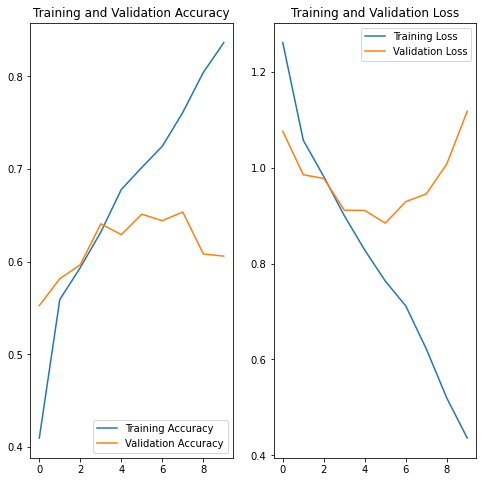

In [34]:
plt.figure(figsize=(8,8))
plt.subplot(1,2,1)
plt.plot(epochs_range,acc, label = 'Training Accuracy')
plt.plot(epochs_range, val_acc, label = 'Validation Accuracy')
plt.legend(loc= 'lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1,2,2)
plt.plot(epochs_range,loss, label = 'Training Loss')
plt.plot(epochs_range, val_loss, label = 'Validation Loss')
plt.legend(loc= 'upper right')
plt.title('Training and Validation Loss')
plt.show()

In [35]:
import matplotlib.pyplot as plt


(32, 160, 160, 3)
(32,)


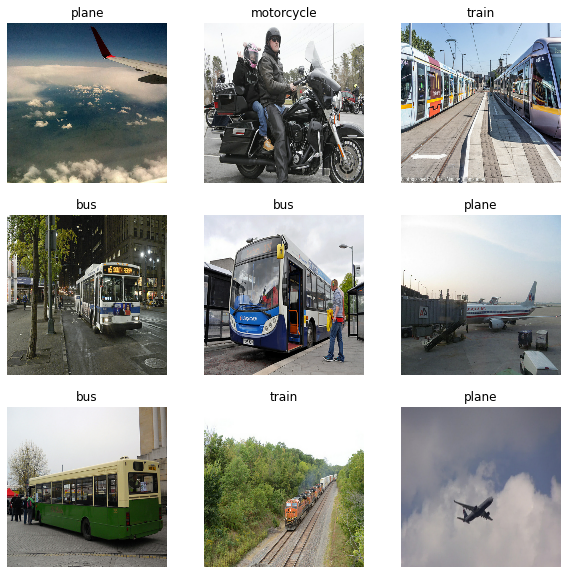

In [36]:
plt.figure(figsize= (10,10))
for images, labels in train_ds.take(1):
    for i in range (9):
        ax= plt.subplot(3,3,i+1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(class_names[labels[i]])
        plt.axis("off")
for image_batch, labels_batch in train_ds:
    print(image_batch.shape)
    print(labels_batch.shape)
    break

In [37]:
# we then use data augmentation

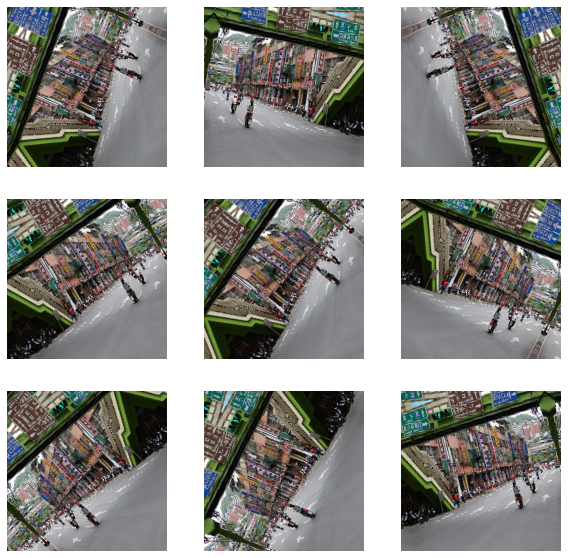

In [38]:
data_augmentation = tf.keras.Sequential([
    tf.keras.layers.experimental.preprocessing.RandomFlip('horizontal'),
    tf.keras.layers.experimental.preprocessing.RandomRotation(0.2),
])

for image, _ in train_ds.take(1):
    plt.figure(figsize=(10,10))
    first_image = image[0]
    for i in range (9):
        ax = plt.subplot(3,3, i +1)
        augmented_image = data_augmentation(tf.expand_dims(first_image,0))
        plt.imshow(augmented_image[0]/255)
        plt.axis('off')

In [39]:
#running model again after augumentation

In [40]:
model = Sequential([
    layers.experimental.preprocessing.Rescaling(1./255, input_shape = (img_height, img_width, 3)),
    
    layers.Conv2D(16,3, padding='same', activation = 'relu'),
    layers.MaxPooling2D(),
    
    layers.Conv2D(32,3, padding = 'same', activation = 'relu'),
    layers.MaxPooling2D(),
    
    layers.Conv2D(64,3, padding = 'same', activation = 'relu'),
    layers.MaxPooling2D(),
    
    layers.Conv2D(128,3, padding = 'same', activation = 'relu'),
    layers.MaxPooling2D(),
    
    layers.Conv2D(256,3, padding = 'same', activation = 'relu'),
    layers.MaxPooling2D(),
    
    layers.Flatten(),
    
    layers.Dense(508, activation = 'relu'),
    layers.Dense(num_classes)
])

In [41]:
model.compile(optimizer = 'adam',
             loss = keras.losses.SparseCategoricalCrossentropy(from_logits= True),
             metrics = ['accuracy'])

In [42]:
model.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling_7 (Rescaling)     (None, 160, 160, 3)       0         
                                                                 
 conv2d_25 (Conv2D)          (None, 160, 160, 16)      448       
                                                                 
 max_pooling2d_21 (MaxPoolin  (None, 80, 80, 16)       0         
 g2D)                                                            
                                                                 
 conv2d_26 (Conv2D)          (None, 80, 80, 32)        4640      
                                                                 
 max_pooling2d_22 (MaxPoolin  (None, 40, 40, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_27 (Conv2D)          (None, 40, 40, 64)       

In [43]:
%%time
epochs = 10
history = model.fit(
train_ds,
validation_data = val_ds,
epochs = epochs)

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']
epochs_range = range(epochs)

Epoch 1/10
108/108 [==============================] - 72s 663ms/step - loss: 1.2244 - accuracy: 0.4469 - val_loss: 1.0535 - val_accuracy: 0.5655
Epoch 2/10
108/108 [==============================] - 70s 652ms/step - loss: 1.0523 - accuracy: 0.5603 - val_loss: 1.0318 - val_accuracy: 0.5910
Epoch 3/10
108/108 [==============================] - 71s 655ms/step - loss: 0.9744 - accuracy: 0.6032 - val_loss: 0.9607 - val_accuracy: 0.6176
Epoch 4/10
108/108 [==============================] - 70s 650ms/step - loss: 0.9323 - accuracy: 0.6214 - val_loss: 0.9576 - val_accuracy: 0.6130
Epoch 5/10
108/108 [==============================] - 70s 651ms/step - loss: 0.8664 - accuracy: 0.6524 - val_loss: 0.9274 - val_accuracy: 0.6362
Epoch 6/10
108/108 [==============================] - 70s 652ms/step - loss: 0.8079 - accuracy: 0.6764 - val_loss: 0.8874 - val_accuracy: 0.6535
Epoch 7/10
108/108 [==============================] - 71s 655ms/step - loss: 0.7368 - accuracy: 0.7111 - val_loss: 0.8993 - val_ac

In [44]:
#not much improvements in my model so we create a basemodel

In [45]:
#create a basemodel from the pre-trained model MobileNet V2
IMG_SIZE = (160, 160)
IMG_SHAPE = IMG_SIZE + (3,)
base_model = tf.keras.applications.MobileNetV2(input_shape = IMG_SHAPE,
                                              include_top= False,
                                              weights = 'imagenet')
image_batch, label_batch = next(iter(train_ds))
feature_batch = base_model(image_batch)
print(feature_batch.shape)

(32, 5, 5, 1280)


In [46]:
base_model.trainable = False
base_model.summary()

global_average_layer = tf.keras.layers.GlobalAveragePooling2D()
feature_batch_average = global_average_layer(feature_batch)
print(feature_batch_average.shape)

Model: "mobilenetv2_1.00_160"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 160, 160, 3  0           []                               
                                )]                                                                
                                                                                                  
 Conv1 (Conv2D)                 (None, 80, 80, 32)   864         ['input_1[0][0]']                
                                                                                                  
 bn_Conv1 (BatchNormalization)  (None, 80, 80, 32)   128         ['Conv1[0][0]']                  
                                                                                                  
 Conv1_relu (ReLU)              (None, 80, 80, 32)   0           ['bn_Conv1[0][

In [47]:
prediction_layer = tf.keras.layers.Dense(4)
prediction_batch = prediction_layer(feature_batch_average)
print(prediction_batch.shape)

(32, 4)


In [48]:
preprocess_input = tf.keras.applications.mobilenet_v2.preprocess_input

In [49]:
%%time
inputs = tf.keras.Input(shape= (160,160,3))
x = data_augmentation(inputs)
x = preprocess_input(x)
x= base_model(x, training = False)
x = global_average_layer(x)
x = tf.keras.layers.Dropout(0.2)(x)
outputs = prediction_layer(x)
model = tf.keras.Model(inputs,outputs)

base_learning_rate = 0.0001
model.compile(optimizer= tf.keras.optimizers.Adam(learning_rate = base_learning_rate),
             loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits= True),
             metrics= ['accuracy'])

model.summary()

len(model.trainable_variables)

initial_epochs = 10

loss0, accuracy0 = model.evaluate(val_ds)

print('initial loss: {:.2f}'.format(loss0))
print('initail accuracy{:.2f}'.format(accuracy0))

history  = model.fit(train_ds,
                    epochs= initial_epochs,
                    validation_data= val_ds)

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 160, 160, 3)]     0         
                                                                 
 sequential_6 (Sequential)   (None, 160, 160, 3)       0         
                                                                 
 tf.math.truediv (TFOpLambda  (None, 160, 160, 3)      0         
 )                                                               
                                                                 
 tf.math.subtract (TFOpLambd  (None, 160, 160, 3)      0         
 a)                                                              
                                                                 
 mobilenetv2_1.00_160 (Funct  (None, 5, 5, 1280)       2257984   
 ional)                                                          
                                                             

In [50]:
epochs = 10

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']
epochs_range = range(epochs)

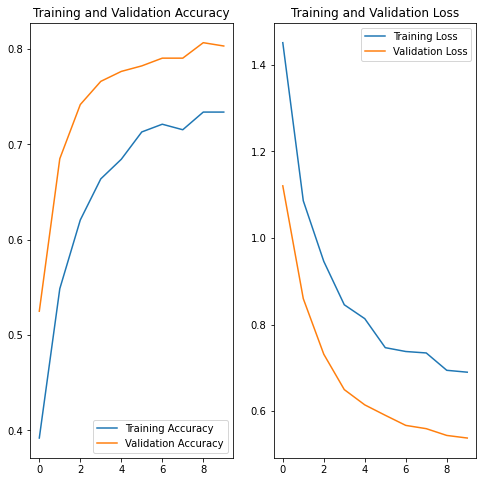

In [51]:
plt.figure(figsize=(8,8))
plt.subplot(1,2,1)
plt.plot(epochs_range,acc, label = 'Training Accuracy')
plt.plot(epochs_range, val_acc, label = 'Validation Accuracy')
plt.legend(loc= 'lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1,2,2)
plt.plot(epochs_range,loss, label = 'Training Loss')
plt.plot(epochs_range, val_loss, label = 'Validation Loss')
plt.legend(loc= 'upper right')
plt.title('Training and Validation Loss')
plt.show()


In [52]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 160, 160, 3)]     0         
                                                                 
 sequential_6 (Sequential)   (None, 160, 160, 3)       0         
                                                                 
 tf.math.truediv (TFOpLambda  (None, 160, 160, 3)      0         
 )                                                               
                                                                 
 tf.math.subtract (TFOpLambd  (None, 160, 160, 3)      0         
 a)                                                              
                                                                 
 mobilenetv2_1.00_160 (Funct  (None, 5, 5, 1280)       2257984   
 ional)                                                          
                                                             

In [53]:
# base_model.layers[:100]

In [54]:
base_model.trainable = True
base_model.summary()

#lets take a look to see how many layers are in the base model
print("Number of layers in the base model: ", len(base_model.layers))

#fine tune for these layers onwards
fine_tune_at = 125

#freeze all layers before the 'fine_tuen_at' layer
for layer in base_model.layers[:fine_tune_at]:
    layer.trainable = False

Model: "mobilenetv2_1.00_160"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 160, 160, 3  0           []                               
                                )]                                                                
                                                                                                  
 Conv1 (Conv2D)                 (None, 80, 80, 32)   864         ['input_1[0][0]']                
                                                                                                  
 bn_Conv1 (BatchNormalization)  (None, 80, 80, 32)   128         ['Conv1[0][0]']                  
                                                                                                  
 Conv1_relu (ReLU)              (None, 80, 80, 32)   0           ['bn_Conv1[0][

In [55]:
base_learning_rate = 0.0001
model.compile(optimizer = tf.keras.optimizers.RMSprop(learning_rate= base_learning_rate/10),
             loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits= True),
             metrics = ['accuracy'])

In [56]:
%%time
initial_epochs = 20
fine_tune_epochs = 20
total_epochs = initial_epochs + fine_tune_epochs

history_fine = model.fit(train_ds, epochs= total_epochs, initial_epoch = history.epoch[-1],validation_data= val_ds)

Epoch 10/40
108/108 [==============================] - 81s 716ms/step - loss: 0.6697 - accuracy: 0.7441 - val_loss: 0.5035 - val_accuracy: 0.8111
Epoch 11/40
108/108 [==============================] - 76s 707ms/step - loss: 0.6089 - accuracy: 0.7650 - val_loss: 0.4910 - val_accuracy: 0.8216
Epoch 12/40
108/108 [==============================] - 76s 705ms/step - loss: 0.5822 - accuracy: 0.7702 - val_loss: 0.4810 - val_accuracy: 0.8181
Epoch 13/40
108/108 [==============================] - 77s 711ms/step - loss: 0.5562 - accuracy: 0.7780 - val_loss: 0.4849 - val_accuracy: 0.8169
Epoch 14/40
108/108 [==============================] - 77s 716ms/step - loss: 0.5363 - accuracy: 0.7925 - val_loss: 0.4717 - val_accuracy: 0.8239
Epoch 15/40
108/108 [==============================] - 77s 715ms/step - loss: 0.5278 - accuracy: 0.7922 - val_loss: 0.4797 - val_accuracy: 0.8216
Epoch 16/40
108/108 [==============================] - 76s 707ms/step - loss: 0.5031 - accuracy: 0.8032 - val_loss: 0.4759 -

In [57]:
acc += history_fine.history['accuracy']
val_acc += history_fine.history['val_accuracy']

loss += history_fine.history['loss']
val_loss += history_fine.history['val_loss']

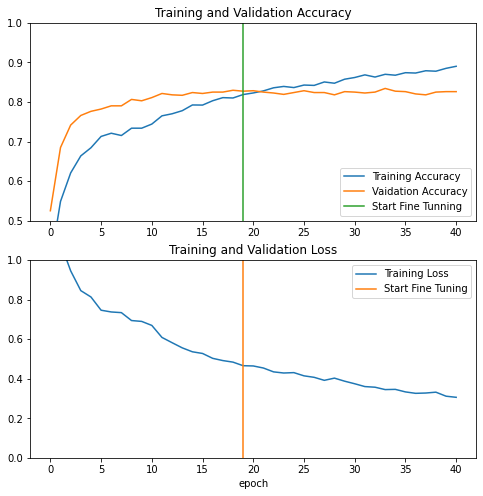

108/108 [==============================] - 44s 403ms/step - loss: 0.2454 - accuracy: 0.9114
Test Accuracy:  0.911432683467865


In [58]:
plt.figure(figsize = (8,8))
plt.subplot(2,1,1)
plt.plot(acc , label = 'Training Accuracy')
plt.plot(val_acc, label = 'Vaidation Accuracy')
plt.ylim([0.5,1])
plt.plot([initial_epochs-1,initial_epochs-1],
        plt.ylim(), label = 'Start Fine Tunning')
plt.legend(loc= 'lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(2,1,2)
plt.plot(loss, label = 'Training Loss')
plt.plot(val_loss = ' Validation loss')
plt.ylim([0, 1.0])
plt.plot([initial_epochs-1, initial_epochs-1],
        plt.ylim(), label = 'Start Fine Tuning')
plt.legend(loc='upper right')
plt.title( 'Training and Validation Loss')
plt.xlabel('epoch')
plt.show()

loss, accuracy = model.evaluate(train_ds)
print('Test Accuracy: ', accuracy)

In [59]:
print(train_ds)

<PrefetchDataset shapes: ((None, 160, 160, 3), (None,)), types: (tf.float32, tf.int32)>


In [60]:
test_ds = tf.keras.preprocessing.image_dataset_from_directory(data_dir_test,

                                                            seed = 123,
                                                            image_size= (img_height,img_width),
                                                            batch_size = batch_size,
                                                            )

Found 20 files belonging to 4 classes.


In [61]:
loss, accuracy = model.evaluate(test_ds)
print("Accuracy:", accuracy)

1/1 [==============================] - 1s 948ms/step - loss: 0.2532 - accuracy: 0.9000
Accuracy: 0.8999999761581421


In [62]:
image_batch, label_batch = test_ds.as_numpy_iterator().next()
predictions = model.predict_on_batch(image_batch).flatten()

In [63]:
predictions = model.predict_on_batch(image_batch)

In [64]:
predictions

array([[ 1.1276436 ,  2.0087304 , -1.1345884 , -0.5071079 ],
       [ 1.6910139 , -1.8753185 , -6.2877703 ,  2.083861  ],
       [-1.4084857 , -4.5856905 ,  4.252372  , -0.87738746],
       [ 0.8701357 , -4.2750316 , -1.8139687 ,  2.2605548 ],
       [-3.2216632 , -4.011478  ,  7.309323  , -2.1128561 ],
       [ 3.4300778 , -2.2715986 , -3.2419143 , -2.1534674 ],
       [ 3.015897  ,  2.1173427 , -4.0765376 , -2.6837254 ],
       [ 2.4669719 , -2.7793593 , -2.3500066 ,  1.0057849 ],
       [-0.43704316,  1.1095552 , -3.1685102 ,  1.1574142 ],
       [-1.7248092 , -3.5971746 , -4.409287  ,  6.0943117 ],
       [-1.9126405 , -2.3950849 ,  1.8488662 , -0.63662547],
       [-1.4258119 , -4.9032903 ,  4.9371276 , -1.5983737 ],
       [ 3.1132593 , -3.6665845 , -4.865383  ,  3.7648263 ],
       [-1.0682588 , -3.9146986 , -4.0671754 ,  5.590943  ],
       [-1.2844803 , -2.5810807 ,  2.477582  , -0.15325654],
       [-1.171558  ,  1.5243175 , -1.7540581 , -2.8536334 ],
       [-3.1287074 ,  5.

In [65]:
max([-2.8434093e+00, -5.5045147e+00,  4.7291694e+00, -2.2254145e+00])

4.7291694

In [66]:
for i in predictions:
    print(np.argmax(i))

1
3
2
3
2
0
0
0
3
3
2
2
3
3
2
1
1
1
0
0


In [67]:
predictions_ = [np.argmax(i) for i in predictions]

In [68]:
predictions_

[1, 3, 2, 3, 2, 0, 0, 0, 3, 3, 2, 2, 3, 3, 2, 1, 1, 1, 0, 0]

In [69]:
print("Predictions :", np.array(predictions_))
print("Labels :     ", label_batch)

Predictions : [1 3 2 3 2 0 0 0 3 3 2 2 3 3 2 1 1 1 0 0]
Labels :      [1 3 2 3 2 0 1 0 3 3 2 2 0 3 2 1 1 1 0 0]


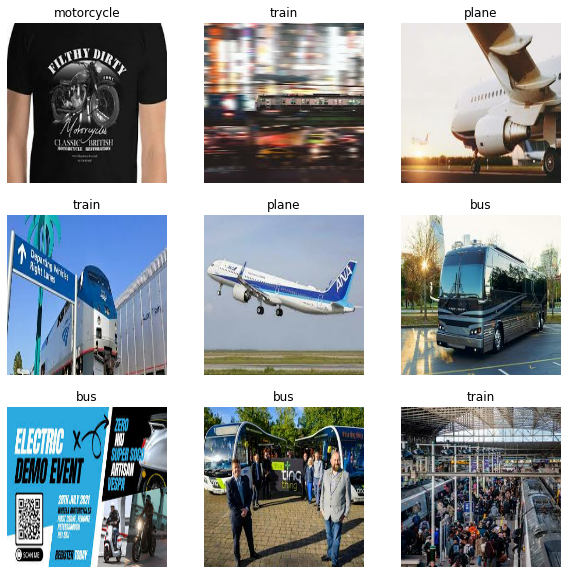

In [70]:
plt.figure(figsize = (10,10))
for i in range(9):
    ax = plt.subplot(3,3,i+1)
    plt.imshow(image_batch[i].astype("uint8"))
    plt.title(class_names[predictions_[i]])
    plt.axis("off")

In [ ]:
#Integrating the tf explainability methods to visualise how my model makes predictions on a pretrained model

In [114]:
image_path ='./vehicle2/bus/1.jpg'

In [120]:
# Load pretrained model or your own
model = tf.keras.applications.MobileNetV2(input_shape = IMG_SHAPE,
                                              include_top= False,
                                              weights = 'imagenet')

# Load a sample image (or multiple ones)
img_ = tf.keras.preprocessing.image.load_img(image_path, target_size=(160, 160))
img_ = tf.keras.preprocessing.image.img_to_array(img_)
data = ([img_], None)

# Start explainer
explainer = GradCAM()
grid = explainer.explain(data, model, class_index=0)  

explainer.save(grid, ".", "bus_grad_cam.png")

In [ ]:
# the places where the images are most highlighted or brightest is where the model focuses on to determine what image it is